# Análisis de tópicos con LDA (Latent Dirichlet Allocation)

## 3.1 Motivación

El __análisis de tópicos__ permite descubrir, a partir de los propios textos, el conjunto de tópicos que estos abordan. Se trata de un análisis automatizado, que podría ser difícil de llevar a cabo manualmente, debido a la cantidad de textos.

Uno de los algoritmos más comunes para analizar tópicos es el algoritmo _Latent Dirichlet Allocation (LDA)_ (Artículo "Latent Dirichlet Allocation" : https://drive.google.com/file/d/1BobImO3192hifZPLXowd14gryVAUzBPW/view)

__¿Qué hace LDA?__

Dado un número de tópicos definido por el analista, el modelo permite asociar una distribución de tópicos $\theta_d$ a cada texto $d$ y al mismo tiempo, la distribución de palabras $\beta_t$ en cada tópico $t$.

<img src="img/f1.jpg"/>

<img src="img/f2.jpg"/>

## 3.2 ¿Cómo hacer un análisis de tópicos en Python?


### 3.2.1 Cargar el dataset de noticias

In [4]:
import pandas

# leer el archivo CSV
archivo = "./noticias_losrios_2022_porcomuna.csv"
corpus = pandas.read_csv(archivo)
corpus.drop('Unnamed: 0', axis=1, inplace=True)
corpus

,id_news,country,media_outlet,url,title,text,date,search,Lago_Ranco,Los_Lagos,Futrono,Río_Bueno,La_Unión,Panguipulli,Paillaco,Corral,Máfil,Lanco,Mariquina,Valdivia
0,47314428.0,chile,suractual,https://www.suractual.cl/2022/01/24/ante-proye...,Ante proyecto Tierras Raras municipio y Unión ...,“Considerando la evolución que ha tenido el Pr...,2022-01-24,NaN,0,0,0,0,0,0,0,0,0,0,0,0
1,47719086.0,chile,noticiaslosrios,https://www.noticiaslosrios.cl/2022/01/25/trac...,Tractocamión volcó esta mañana en puente Lloll...,El accidente se produjo pasadas las 06:00 AM y...,2022-01-25,NaN,0,0,0,0,1,0,0,0,0,0,0,0
2,47719110.0,chile,noticiaslosrios,https://www.noticiaslosrios.cl/2022/01/27/gobe...,Gobernadores Regionales de Los Ríos y Los Lago...,La instancia buscó generar un trabajo colabora...,2022-01-27,NaN,0,1,0,1,0,0,0,0,0,0,0,0
3,47700339.0,chile,diariolaguino,https://www.diariolaguino.cl/noticia/actualida...,Alegan inocencia de acusadas por cruel asesina...,La defensa de las dos mujeres acusadas de enca...,2022-01-05,NaN,0,0,0,0,0,0,0,0,0,0,0,1
4,47700425.0,chile,diariolaguino,https://www.diariolaguino.cl/noticia/actualida...,Destacan ejecución del Programa Vínculos en Lo...,Para dar protección y acompañamiento a adultos...,2022-01-03,NaN,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15142,50428917.0,chile,diariolaguino,https://www.diariolaguino.cl/noticia/educacion...,Admisión 2023: Caravana Técnico Profesional de...,Desde este lunes 12 y hasta el miércoles 14 de...,2022-12-13,NaN,0,1,0,0,0,0,0,0,0,0,0,0
15143,50428943.0,chile,diariolaguino,https://www.diariolaguino.cl/noticia/emergenci...,Triple colisión en Los Lagos deja al menos un ...,Tres vehículos se vieron involucrados en un ac...,2022-12-07,NaN,0,1,0,0,0,0,0,0,0,0,0,0
15144,50428975.0,chile,diariolaguino,https://www.diariolaguino.cl/noticia/opinion/2...,Columna de opinión: No quedó ni el sombrero - ...,“Somos en realidad sacos llenos de cosas inédi...,2022-12-09,NaN,0,0,0,0,0,0,0,0,0,0,0,0
15145,50429002.0,chile,diariolaguino,https://www.diariolaguino.cl/noticia/emergenci...,Triste despertar en Los Lagos: comunidad lamen...,Un triste despertar ha tenido este domingo la ...,2022-12-04,NaN,0,1,0,0,0,0,0,0,0,0,0,0


- Son 15.147 noticias en total.

In [5]:
len(corpus)

15147

- En el tutorial, trabajaremos con una muestra de 2.000 noticias

In [17]:
corpus = corpus[0:2000]
len(corpus)

2000

- Creamos una lista de noticias a partir del corpus

In [18]:
noticias = corpus.text.values.tolist()

In [19]:
noticias[501]

'Debido a la alta tasa de contagios, desde el municipio decidieron cancelar las ferias que se iban a desarrollar durante las próximas dos semanas en la comuna. “Era algo que podía suceder”. Con estas palabras el alcalde Andrés Reinoso reaccionó al retroceso de la comuna al paso tres del Plan Paso del Ministerio de Salud. Los diversos focos de contagio que hay actualmente y la reducción en aforos que implica estar en esta fase, obligaron al municipio a tomar decisiones drásticas respecto a las actividades programadas para los próximos días. “Lamentamos la situación que está viviendo el país y nosotros no estamos ajenos a lo que está pasando. Debido a este cambio de fase tenemos que suspender la Feria Frutos de La Unión, Sabores de la Tierra que se iba a realizar este fin de semana en el Parque Municipal. A esto se suman los shows rurales de Huillinco, Puerto Nuevo y Choroico”, comentó el alcalde. La primera autoridad comunal no descartó que estos eventos que hoy se suspenden, puedan ser

### 3.2.2  Instalación de librerias

- Instalamos en nuestra máquina la libreria "pyLDAvis" que permite visualizar los resultados del análisis de tópicos 

In [20]:
#!pip install pyLDAvis

- Utilizaremos spacy para procesar textos en español (no es útil instalar la libreria con "pip instal..." ya que ya lo hicimos en notebook anterior)

In [21]:
import spacy
from spacy.matcher import Matcher
nlp = spacy.load("es_core_news_sm")
matcher = Matcher(nlp.vocab)

/home/mvernier/.local/lib/python3.8/site-packages/spacy/util.py:887: UserWarning: [W095] Model 'es_core_news_sm' (3.0.0) was trained with spaCy v3.0 and may not be 100% compatible with the current version (3.5.2). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


- Utilizaremos Gensim (para el análisis de tópicos) y pyLDAvis (para visualizar los tópicos)

In [22]:
#!pip install gensim

In [23]:
import numpy as np
import pandas as pd

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

### 3.2.3 Preprocesamiento de las noticias

Procesaremos todas las noticias para representarlas como una lista de:
- sustantivos (NOUN)
- y conceptos claves (NOUN-de-NOUN) y (NOUN-ADJ)
- entidades (PER) y (ORG)

- Agregamos patrones para buscar conceptos claves

In [24]:
pattern_1 = [{"POS": "NOUN"},{"LOWER": "de"}, {"POS": "NOUN"}]
matcher.add("NOUN-de-NOUN", [pattern_1])

pattern_2 = [{"POS": "NOUN"}, {"POS": "ADJ"}]
matcher.add("NOUN-ADJ", [pattern_2])

- Definemos una función para preprocesar una noticia y transformarla en una lista de "palabras" relevantes.

In [25]:
def text_to_list(noticia):
    list_of_words = []
    
    try:
        doc = nlp(noticia)

        for token in doc:
            if (token.pos_=="NOUN"):
                list_of_words.append(token.text)

        for ent in doc.ents:
            if (ent.label_ == "PER" and " " in ent.text):
                list_of_words.append(ent.text)

        matches = matcher(doc)

        for match_id, start, end in matches:
            span = doc[start:end]  # The matched span
            list_of_words.append(span.text)
    
    except Exception as e: 
        print(noticia)
        print(e)
    
    return list_of_words

In [26]:
noticias[0]

'“Considerando la evolución que ha tenido el Proyecto Minero Tierras Raras, en elServicio de Evaluación Ambiental, podemos concluir que esta iniciativa será votada por el gobierno, entre los meses de marzo y abril». «Por lo anterior, y tal como lo señaláramos durante el año 2021, convocaremos en conjunto con la Unión Comunal de Juntas de Vecinos y las organizaciones sociales de la ciudad, a una Consulta Ciudadana Comunal, para el domingo 27 de febrero”. Con estas palabras el alcalde Víctor Hugo Figueroa anunció la fecha en que se llevará a cabo la jornada, que busca tener de manera objetiva y transparente la opinión de la comunidad ante este polémico proyecto. Con respecto a la logística de la jornada, anticipó que podrán votar todos los ciudadanos inscritos en el padrón electoral de la ciudad histórica y el horario será de 09:00 a 19:00 h. Asimismo, participarán 120 vocales de mesa y se habilitarán cuatro establecimientos educacionales como lugares de votación: Escuela Italia, Liceo P

In [27]:
text_to_list(noticias[0])

['“',
 'evolución',
 'iniciativa',
 'gobierno',
 'meses',
 'marzo',
 'abril',
 'tal',
 'año',
 'conjunto',
 'organizaciones',
 'ciudad',
 'domingo',
 'febrero',
 'palabras',
 'alcalde',
 'fecha',
 'cabo',
 'jornada',
 'manera',
 'opinión',
 'comunidad',
 'proyecto',
 'respecto',
 'logística',
 'jornada',
 'ciudadanos',
 'padrón',
 'ciudad',
 'horario',
 '19:00',
 'vocales',
 'mesa',
 'establecimientos',
 'lugares',
 'votación',
 'decisión',
 'opinión',
 'vecinos',
 'determinación',
 'rechazo',
 'proyecto',
 'herramientas',
 'democracia',
 '”',
 'Evaluación Ambiental',
 'Víctor Hugo Figueroa',
 'Víctor Hugo Figueroa',
 'meses de marzo',
 'organizaciones sociales',
 'manera objetiva',
 'ciudadanos inscritos',
 'padrón electoral',
 'ciudad histórica',
 'vocales de mesa',
 'establecimientos educacionales',
 'lugares de votación']

- Transformamos todas las noticias de nuestro corpus "noticias" aplicando la función "text_to_list". De cierta manera, simplificará el texto guardando solamente las palabras y conceptos importantes.

In [28]:
noticias_procesadas = []

for index, noticia in enumerate(noticias):
    print(index)
    noticia_procesada = text_to_list(noticia)
    noticias_procesadas.append(noticia_procesada)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999


- Veamos cómo se transformó una cierta noticia. La variable "N" representa el rango de la noticia en nuestro corpus.

In [29]:
N=5

In [30]:
print(noticias[N])

Con la aprobación del Concejo Municipal a la propuesta de crear la primera Corporación Municipal de Fomento Productivo de la comuna, el alcalde Aldo Retamal valoró y agradeció la disposición de los concejales para avanzar en la formación de esta entidad de carácter privado que permitirá generar de forma más expedita convenios y apoyo de distintos sectores productivos y de desarrollo económico. En ese sentido, la máxima autoridad local señaló que: “tal como lo indicamos en nuestro programa que presentamos a la comunidad en la campaña electoral, esta Corporación Municipal busca articular dos áreas importantes, lo público y privado partiendo por los actores relevantes a nivel lo cal. A ello, se suma poder generar acciones que mediante las leyes vigentes que nos rigen a los municipios nos limita nuestro rango de operaciones con el mundo privado. Desde ahora podremos contar con dos alternativas para generar proyectos y buscar recursos, desde el área municipal y desde esta entidad con person

- Se simplificó en:

In [31]:
print(noticias_procesadas[5])

['aprobación', 'propuesta', 'comuna', 'alcalde', 'disposición', 'concejales', 'formación', 'entidad', 'carácter', 'forma', 'convenios', 'apoyo', 'sectores', 'desarrollo', 'sentido', 'autoridad', '“', 'tal', 'programa', 'comunidad', 'campaña', 'áreas', 'actores', 'nivel', 'acciones', 'leyes', 'municipios', 'rango', 'operaciones', 'mundo', 'alternativas', 'proyectos', 'recursos', 'área', 'entidad', 'personalidad', 'serie', 'oportunidades', 'comuna', 'organismo', 'creación', 'propuesta', 'conformación', 'directorio', 'entidad', 'personalidad', '“', 'alcalde', 'manera', 'representación', 'entidades', 'nivel', 'alcalde', 'tanto', 'posibilidad', 'integrante', 'organismo', 'forma', 'miembro', 'municipio', 'funcionario', 'relevancia', 'áreas', 'organización', 'cuanto', 'socios', 'personas', 'fines', 'fines', 'lucro', 'votación', 'iniciativa', 'aprobación', 'sesión', 'jueves', 'pasado', 'visto', 'concejales', 'Concejo Municipal', 'Corporación Municipal', 'Concejo Municipal', 'Tamara Pastén', 'J

### 3.2.4 Preparar los datos de entrada de LDA

los datos de entrada de LDA son: 
- un diccionario (variable 'id2word')
- nuestro dataset preprocesado ('noticias_procesadas')

In [32]:
# Create Dictionary
id2word = corpora.Dictionary(noticias_procesadas)
id2word

- Se asigna una ID a cada palabra (o concepto) del vocabulario. Por ejemplo con el ID=25 corresponde a la palabra:

In [33]:
id2word[2]

'Víctor Hugo Figueroa'

In [34]:
texts = noticias_procesadas

- Ahora una noticia se vuelve imposible de leer para un humano. Miremos por ejemplo la noticia N.

In [35]:
dataset = [id2word.doc2bow(noticia_procesada) for noticia_procesada in noticias_procesadas]

# View
print(dataset[:N])

[[(0, 1), (1, 1), (2, 2), (3, 1), (4, 1), (5, 1), (6, 1), (7, 2), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 2), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 2), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 2), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1)], [(52, 1), (53, 3), (54, 1), (55, 1), (56, 1), (57, 1), (58, 2), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 2), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 2), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 3), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1)], [(11, 1), (26, 1), (44, 1), (50, 2), (65, 1), (98, 1), (99, 1), (100, 2), (101, 3), (102, 1), (103, 1), (104, 1), (105, 1),

### 3.3. Entrenamiento del modelo de tópico con LDA

- Entrenaremos un primer modelo de tópicos buscando un modelo con 10 tópicos. 

In [36]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=dataset,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

### 3.4. Visualizar los tópicos encontrados

- Se puede imprimir los tópicos con sus principales palabras principales...

In [37]:
from pprint import pprint

pprint(lda_model.print_topics(num_words=100))

[(0,
  '0.014*"“" + 0.013*"febrero" + 0.010*"comuna" + 0.009*"región" + '
  '0.008*"actividades" + 0.008*"alcalde" + 0.008*"municipio" + '
  '0.007*"actividad" + 0.007*"”" + 0.007*"proceso" + 0.007*"año" + '
  '0.006*"parte" + 0.006*"trabajo" + 0.006*"uso" + 0.005*"desarrollo" + '
  '0.005*"comunas" + 0.005*"agua" + 0.005*"evento" + 0.005*"través" + '
  '0.005*"medidas" + 0.004*"salud" + 0.004*"participación" + 0.004*"nivel" + '
  '0.004*"cáncer" + 0.004*"productos" + 0.004*"verano" + 0.004*"forma" + '
  '0.004*"años" + 0.004*"semana" + 0.004*"comunidad" + 0.004*"apoyo" + '
  '0.003*"respecto" + 0.003*"territorio" + 0.003*"organizaciones" + '
  '0.003*"espacios" + 0.003*"protección" + 0.003*"objetivo" + 0.003*"área" + '
  '0.003*"recursos" + 0.003*"viernes" + 0.003*"línea" + 0.003*"compromiso" + '
  '0.003*"organización" + 0.003*"cabo" + 0.003*"país" + 0.003*"enero" + '
  '0.003*"cargo" + 0.003*"manera" + 0.003*"información" + 0.003*"jornada" + '
  '0.003*"autoridad" + 0.003*"marco" + 

- ... o se puede visualizar mejor con la libreria pyLDAvis

In [38]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, dataset, id2word)
vis

/home/mvernier/.local/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.232448 -0.059480       1        1  24.052155
2      0.179647 -0.035761       2        1  17.140171
4      0.191245 -0.052657       3        1  13.757027
6     -0.105957 -0.110740       4        1   9.955506
8     -0.157763 -0.179646       5        1   8.595557
7     -0.010265  0.133608       6        1   8.015908
5     -0.004384  0.148535       7        1   7.602652
3     -0.135355 -0.129329       8        1   6.044611
9     -0.053925  0.165095       9        1   3.618423
1     -0.135691  0.120375      10        1   1.217989, topic_info=             Term         Freq        Total Category  logprob  loglift
88         sector   911.000000   911.000000  Default  30.0000  30.0000
738         horas   817.000000   817.000000  Default  29.0000  29.0000
1425     incendio   338.000000   338.000000  Default  28.0000  28.0000
381      personas  1177.000000  1177.000000  Default  27.0000  27.0000
20        febrero   913.000000   913.000000  Default  26.0000  26.0000
...           ...          ...          ...      ...      ...      ...
1331    toneladas     5.090882     5.981982  Topic10  -6.0546   4.2467
1131  tratamiento    11.582666    51.772674  Topic10  -5.2325   2.9106
563       plantas     8.284831    23.511792  Topic10  -5.5676   3.3649
1377        julio     6.688886    14.969178  Topic10  -5.7816   3.6024
2048        aguas     5.404143    83.325573  Topic10  -5.9949   1.6724

[565 rows x 6 columns], token_table=       Topic      Freq                       Term
term                                             
1852       2  0.971605                       2019
2017       4  0.988993  Dr. Miguel Ángel Carrasco
3956       9  0.962081              Enrique Paris
1454       5  0.980388                Juicio Oral
18528      8  0.971526                      Lugar
...      ...       ...                        ...
51         3  0.224456                          ”
51         4  0.039559                          ”
51         6  0.057619                          ”
51         7  0.079979                          ”
51         9  0.012900                          ”

[920 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 5, 7, 9, 8, 6, 4, 10, 2])

### 3.5. Calcular las metricas de Perplejidad (_Model Perplexity_) y Coherencia (_Coherence Score_)

La perplejidad del modelo y la coherencia del tema proporcionan metricas estadisticas para evaluar que tan revante es un modelo para describir el dataset.

In [39]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(dataset))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=noticias_procesadas, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -9.426223847850293

Coherence Score:  0.4612096932436267


### 3.6. ¿Cómo encontrar cuál es el mejor número de tópicos para describir el dataset?

- Queremos encontrar el modelo que optimiza la métrica de coherencia (o minimiza la métrica de perplejidad). Probaremos con distintos valores de número de tópicos.

In [40]:
### NO CAMBIAR ESTA CELDA###

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        print(num_topics)
        
        model = gensim.models.ldamodel.LdaModel(corpus=dataset,
                                           id2word=id2word,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
        
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

- Entrenaremos modelos desde 2 tópicos hasta 15 tópicos con un salto de 2 --> 2, 4, 6, 8, 10, 12, 14

Nota bene: Se puede demorar varios minutos (o incluso varias horas según el tamaño del dataset)

In [41]:
start=2
limit=15
step=2

In [42]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=dataset, texts=noticias_procesadas, start=start, limit=limit, step=step)

2
4
6
8
10
12
14


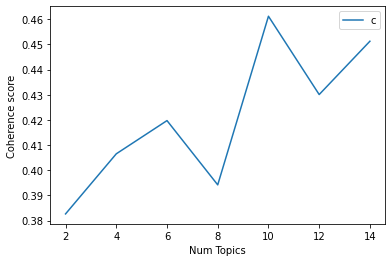

In [43]:

x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

- ¿Cuál modelo conservar? Miraremos la métrica de coherencia...

In [44]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.3827
Num Topics = 4  has Coherence Value of 0.4065
Num Topics = 6  has Coherence Value of 0.4197
Num Topics = 8  has Coherence Value of 0.3942
Num Topics = 10  has Coherence Value of 0.4612
Num Topics = 12  has Coherence Value of 0.4301
Num Topics = 14  has Coherence Value of 0.4513


In [45]:
# Select the model and print the topics
optimal_model = model_list[1]

- Visualizemos el modelo de tópicos

In [46]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(optimal_model, dataset, id2word)
vis

/home/mvernier/.local/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.125786 -0.108090       1        1  44.221509
3      0.092251 -0.151462       2        1  21.738915
2      0.172578  0.117018       3        1  18.018520
1     -0.139043  0.142534       4        1  16.021056, topic_info=           Term         Freq        Total Category  logprob  loglift
88       sector   809.000000   809.000000  Default  30.0000  30.0000
1425   incendio   365.000000   365.000000  Default  29.0000  29.0000
1417  hectáreas   294.000000   294.000000  Default  28.0000  28.0000
196        años  1214.000000  1214.000000  Default  27.0000  27.0000
4       alcalde   425.000000   425.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
327        vida    55.159995   289.159809   Topic4  -6.2485   0.1745
738       horas    64.488316   764.358780   Topic4  -6.0923  -0.6413
358       forma    57.489788   473.336525   Topic4  -6.2071  -0.2769
121      equipo    52.828183   243.937175   Topic4  -6.2917   0.3014
1441     puntos    48.266245   137.808632   Topic4  -6.3820   0.7821

[279 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
6458      3  0.980791        abuso
53        2  0.992754    accidente
786       1  0.995771    actividad
259       1  0.994427  actividades
259       2  0.005955  actividades
...     ...       ...          ...
50        4  0.147984            “
51        1  0.549362            ”
51        2  0.178862            ”
51        3  0.084517            ”
51        4  0.187707            ”

[415 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 3, 2])

### 8. ¿Cuál es el tópico principal de cada documento?

- Podemos analizar cuál es el tópico principal de cada documento

In [47]:
def format_topics_documents(ldamodel=None, corpus=corpus, texts=texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_documents(ldamodel=optimal_model, corpus=dataset, texts=noticias)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(30)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,0.0,0.9942,"“, comuna, ”, región, parte, alcalde, año, tra...",“Considerando la evolución que ha tenido el Pr...
1,1,3.0,0.8727,"sector, comuna, incendio, personas, hectáreas,...",El accidente se produjo pasadas las 06:00 AM y...
2,2,0.0,0.9832,"“, comuna, ”, región, parte, alcalde, año, tra...",La instancia buscó generar un trabajo colabora...
3,3,2.0,0.9014,"años, horas, personas, lugar, comuna, investig...",La defensa de las dos mujeres acusadas de enca...
4,4,0.0,0.9367,"“, comuna, ”, región, parte, alcalde, año, tra...",Para dar protección y acompañamiento a adultos...
5,5,0.0,0.9308,"“, comuna, ”, región, parte, alcalde, año, tra...",Con la aprobación del Concejo Municipal a la p...
6,6,3.0,0.8905,"sector, comuna, incendio, personas, hectáreas,...","En la Delegación Presidencial de Los Ríos, se ..."
7,7,0.0,0.9970,"“, comuna, ”, región, parte, alcalde, año, tra...",El Consejo Regional de Los Ríos aprobó un aume...
8,8,2.0,0.9951,"años, horas, personas, lugar, comuna, investig...",El fiscal Gonzalo Valderas comunicó a Javier C...
9,9,1.0,0.9984,"años, “, medios, ”, año, cáncer, comunicación,...",Un total de 84 mil 174 deudores morosos tiene ...


- La variable "df_dominant_topic" contiene una columna "Dominant_topic" que indica el tópico principal en cada documento y cuál su porcentaje (variable "Topic_Perc_contrib")

- Añadiremos la columna "media_outlet" para saber de qué medio viene cada noticia

In [48]:
media_outlet = corpus.filter(['media_outlet'], axis=1)
df_dominant_topic=df_dominant_topic.join(media_outlet)
df_dominant_topic

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,media_outlet
0,0,0.0,0.9942,"“, comuna, ”, región, parte, alcalde, año, tra...",“Considerando la evolución que ha tenido el Pr...,suractual
1,1,3.0,0.8727,"sector, comuna, incendio, personas, hectáreas,...",El accidente se produjo pasadas las 06:00 AM y...,noticiaslosrios
2,2,0.0,0.9832,"“, comuna, ”, región, parte, alcalde, año, tra...",La instancia buscó generar un trabajo colabora...,noticiaslosrios
3,3,2.0,0.9014,"años, horas, personas, lugar, comuna, investig...",La defensa de las dos mujeres acusadas de enca...,diariolaguino
4,4,0.0,0.9367,"“, comuna, ”, región, parte, alcalde, año, tra...",Para dar protección y acompañamiento a adultos...,diariolaguino
...,...,...,...,...,...,...
1995,1995,3.0,0.9824,"sector, comuna, incendio, personas, hectáreas,...",Un violento accidente de tránsito ocurrió esta...,diariodevaldivia
1996,1996,3.0,0.8722,"sector, comuna, incendio, personas, hectáreas,...",Esta mañana de sábado un vehículo de una escue...,diariodevaldivia
1997,1997,1.0,0.5608,"años, “, medios, ”, año, cáncer, comunicación,...",El Seremi de Gobierno Pedro Lamas destacó la a...,diariolaguino
1998,1998,0.0,0.8850,"“, comuna, ”, región, parte, alcalde, año, tra...",Este lunes el pdte. (s) de la Federación de En...,diariodevaldivia


- Podemos contar cuántos documentos son por tópicos principales:

In [49]:
from pandasql import sqldf 

In [50]:
result = sqldf("SELECT Dominant_Topic, count(*) as nb_noticias FROM df_dominant_topic GROUP BY Dominant_Topic ORDER BY count(*) DESC")
result

,Dominant_Topic,nb_noticias
0,0.0,705
1,3.0,599
2,2.0,434
3,1.0,262


- ¿Cuál es la noticia más representativa de cada tópcio?

- Tópico 1

In [51]:
pd.options.display.max_colwidth = 1000

result = sqldf("SELECT * FROM df_dominant_topic WHERE dominant_topic=1.0 ORDER BY Topic_Perc_Contrib DESC LIMIT 1")
result

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,media_outlet
0,571,1.0,0.9989,"años, “, medios, ”, año, cáncer, comunicación, país, ciudad, tiempo","Hace 20 años Deportivo Valdivia logró su primer título de importancia, el torneo de básquetbol Dimayor 2001, la primera de las tres estrellas que el elenco del Calle Calle ha conquistado a nivel nacional. Deportivo Valdivia fue fundado en 1985, justamente para representar a Valdivia en el torneo de la liga cestera Dimayor y reemplazar el vacío que dejó Phoenix a comienzos de la década de los ochenta. La ciudad ya tenía un pasado cestero importante desde que la selección valdiviana fue campeona nacional en 1937, pasando por los años 50 en la época dorada del baloncesto chileno y la revolución cestera de los años 60 con el aporte del costarricense Edy Bermúdez como jugador y técnico y que la ciudad pudo disfrutar hasta bien entrados los años 70. En 1989, el Deportivo Valdivia accedió a la final de la Dimayor de aquel año, pero fue derrotado por Deportes Ancud. Hasta ese momento había sido la mejor posición que había logrado el club que presidía el dirigente Carlos Kunstmann, quien re...",diariopaillaco


- Tópico 2

In [52]:
pd.options.display.max_colwidth = 1000

result = sqldf("SELECT * FROM df_dominant_topic WHERE dominant_topic=2.0 ORDER BY Topic_Perc_Contrib DESC LIMIT 1")
result

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,media_outlet
0,1259,2.0,0.9976,"años, horas, personas, lugar, comuna, investigación, detención, “, hombre, delito","El Tribunal de Juicio Oral en lo Penal de Valdivia condenó hoy –viernes 4 de febrero– a J.S.Q.H. a la pena efectiva de 12 años y 183 días de presidio, en calidad de autor del delito frustrado de homicidio calificado. Ilícito perpetrado en diciembre de 2019, en la comuna de La Unión. En fallo unánime, el tribunal –integrado por los magistrados Guillermo Olate Aránguiz (presidente), Daniel Mercado Rilling y Alicia Faúndez Valenzuela (redactora)– aplicó, además, a J.S.Q.H. las accesorias legales de inhabilitación absoluta perpetua para cargos y oficios públicos y derechos políticos y la inhabilitación absoluta para profesiones titulares mientras dure la condena; más el pago de las costas de la causa. Asimismo, J.S.Q.H. deberá purgar 4 años de presidio, más las accesorias de inhabilitación absoluta perpetua para derechos políticos y la inhabilitación absoluta para cargos y oficios públicos durante el tiempo de la condena, como autor del delito consumado de abuso sexual de menor de edad...",diariolaguino
